### Iris-Dataset

  - Regressão linear

In [1]:
import os, sys
import pandas as pd # pandas e seu alias pd
import numpy as np  # numpy  e seu alias np

from   scipy import stats
#-- for ANOVA
import statsmodels.api as sm
from   statsmodels.formula.api import ols

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Aulas passadas vimos 2 distribuições desta forma

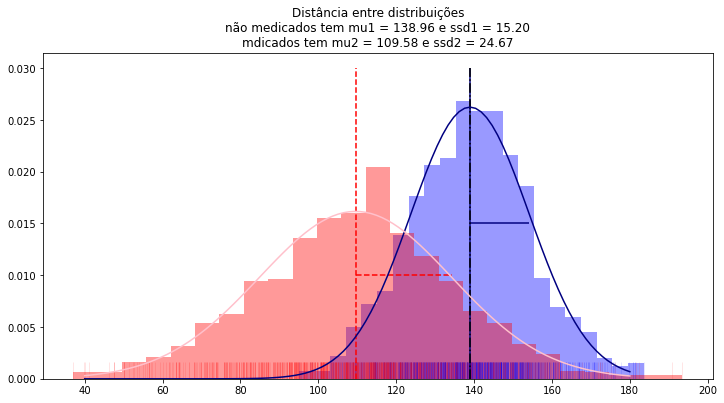

In [13]:
mu1 = 140; sdv1 = 15
mu2 = 110; sdv2 = 25
N   = 1000

samp1 = np.random.normal(loc=mu1, scale=sdv1, size=N)
samp2 = np.random.normal(loc=mu2, scale=sdv2, size=N)

muc1 = np.mean(samp1); sdvc1 = np.std(samp1)
muc2 = np.mean(samp2); sdvc2 = np.std(samp2)

fig = plt.figure(figsize=(12, 6))

#-- se mesmo eixo - figuras estão sobrepostas
ax  = sns.distplot(samp1, kde=False, rug=True, norm_hist=True, color='blue', rug_kws={"color": 'blue', "alpha": .1,})
ret = sns.distplot(samp2, kde=False, rug=True, norm_hist=True, color='red',  rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

hline = 0.03

plt.vlines(muc1, 0, hline, color = 'navy')
plt.hlines(.015, muc1, muc1+sdvc1, color = 'navy');

plt.vlines(muc2, 0, hline, color = 'red', linestyle='--')
plt.hlines(.010, muc2, muc2+sdvc2, color = 'red', linestyle='--')

plt.vlines(muc1, 0, hline, color = 'black', linestyle='-.')

#--- fitando a distribuição normal com muc e sdvc
#---                          Percent Point Function (PPF)
# seqx = np.linspace(mu1-4*sdv1, mu2+4*sdv2, 100)
seqx = np.linspace(40, 180, 100)
sns.lineplot(seqx, stats.norm.pdf(seqx, muc1, sdvc1), color='navy')
sns.lineplot(seqx, stats.norm.pdf(seqx, muc2, sdvc2), color='pink')

title = 'Distância entre distribuições'
title += '\nnão medicados tem mu1 = %.2f e ssd1 = %.2f'%(muc1, sdvc1)
title += '\nmdicados tem mu2 = %.2f e ssd2 = %.2f'%(muc2, sdvc2)
plt.title(title);

### Mas, nós poderíamos ter uma distribuição bidimensional

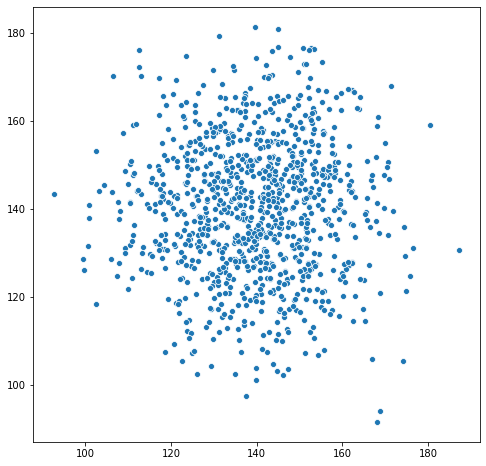

In [14]:
mu1 = 140; sdv1 = 15
N   = 1000

samp1x = np.random.normal(loc=mu1, scale=sdv1, size=N)
samp1y = np.random.normal(loc=mu1, scale=sdv1, size=N)

muc1 = np.mean(samp1x); sdvc1 = np.std(samp1x)
muc2 = np.mean(samp1y); sdvc2 = np.std(samp1y)

fig = plt.figure(figsize=(8, 8))

ax = sns.scatterplot(samp1x, samp1y)

### Dado que as amostras no eixo x e no eixo y são randômicas, a correlação se aproxima do 0

In [15]:
from scipy.stats import pearsonr

cor, pval = pearsonr(samp1x, samp1y)
'correlation = %.3f and p-value = %.2e'%(cor, pval)

'correlation = 0.002 and p-value = 9.46e-01'

### Poderíamos ler as distribuições desta forma

(80.0, 210.0)

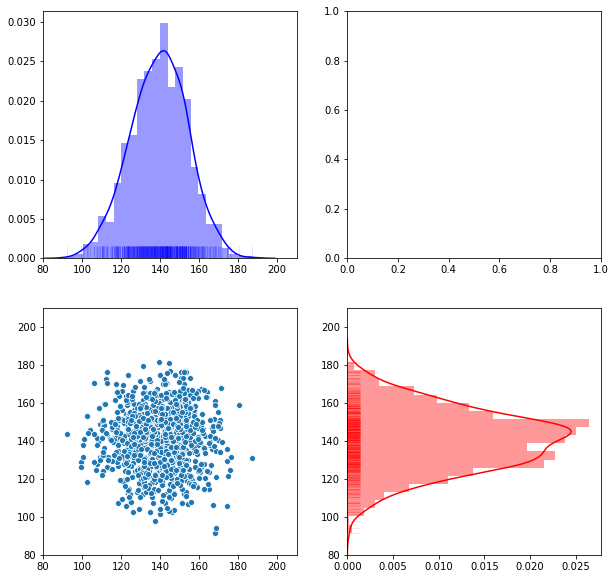

In [16]:
fig, axes = plt.subplots(figsize=(10,10), ncols=2, nrows=2)


ret1 = sns.distplot(samp1x, kde=True, rug=True, norm_hist=True, color='blue', rug_kws={"color": 'blue', "alpha": .1,}, ax=axes[0,0])
axes[0,0].set_xlim(80,210)
ret2 = sns.distplot(samp1y, kde=True, rug=True, norm_hist=True, vertical=True, color='red',  rug_kws={"color": 'red',  "alpha": .1,}, ax=axes[1,1])
axes[1,1].set_ylim(80,210)

ret3 = sns.scatterplot(samp1x, samp1y,ax=axes[1,0])
axes[1,0].set_xlim(80,210)
axes[1,0].set_ylim(80,210)


### Agora tenho dois grupos de dados
  - grupo controle com glicemia perto de 90
  - grupo doente   com glicemia perto de 140

  <br>
  - temos 100 homens (eixo x) e 100 mulheres (eixo y)

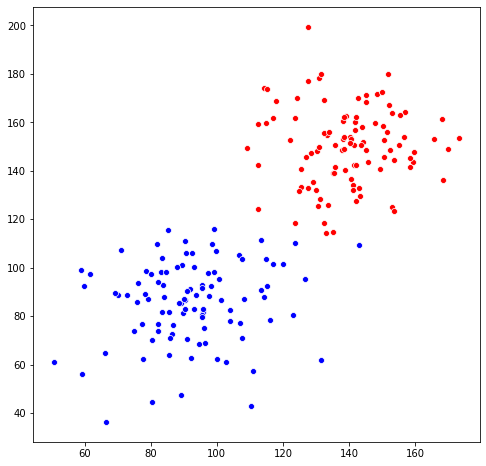

In [6]:
mu1 = 140; sdv1 = 15
mu2 = 90; sdv2 = 15
N   = 100

sampDH = np.random.normal(loc=mu1, scale=sdv1, size=N)
sampDM = np.random.normal(loc=mu1+10, scale=sdv1, size=N)

sampCH = np.random.normal(loc=mu2,   scale=sdv2, size=N)
sampCM = np.random.normal(loc=mu2-5, scale=sdv2, size=N)


fig = plt.figure(figsize=(8, 8))

ax  = sns.scatterplot(sampDH, sampDM, color='red')
ret = sns.scatterplot(sampCH, sampCM, color='blue', ax=ax)


### Aqui começam nosso problema de classificação
  - Queremos separar os 2 grupos
  - Sim, é uma espécie de regressão
  - Mas, não podemos usar a mesma técnica porque senão vai acontecer isto ...

In [7]:
df = pd.DataFrame([sampCH, sampCM, [0]*len(sampCH)]).T
df.columns = ['x', 'y', 'group']

df2 = pd.DataFrame([sampDH, sampDM, [1]*len(sampDH)]).T
df2.columns = ['x', 'y', 'group']

df = df.append(df2)
print(df.shape)
df.group.unique()

(200, 3)


array([0., 1.])

In [8]:
df.head(3)

,x,y,group
0,69.935650,89.206205,0.0
1,86.494168,72.774053,0.0
2,83.013050,98.413861,0.0


In [9]:
df.x = df.x.astype(float)
df.y = df.y.astype(float)

In [10]:
model = ols('y ~ x', data=df)
fit = model.fit()
intercept, a = fit.params

### Não é isto que quero ...
### Isto é Efeito Sympson 

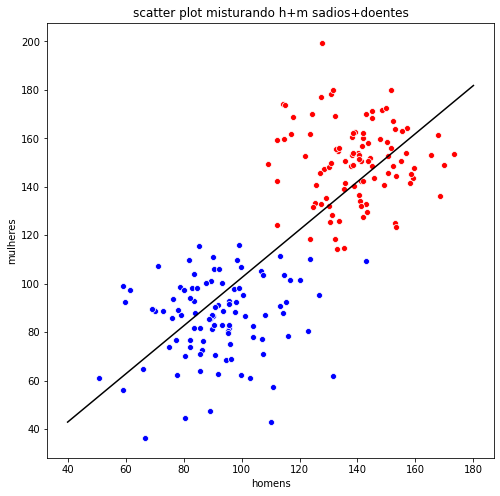

In [11]:
xseq = np.linspace(40, 180)
yseq = intercept + a * xseq

fig = plt.figure(figsize=(8, 8))

ax  = sns.scatterplot(sampDH, sampDM, color='red')
ret = sns.scatterplot(sampCH, sampCM, color='blue', ax=ax)

plt.plot(xseq, yseq, color='black')
plt.xlabel('homens')
plt.ylabel('mulheres')
plt.title('scatter plot misturando h+m sadios+doentes');

### O que quero deve ser uma "reta quase que ortogonal" que separe os dois grupos minimizando erros

por exemplo  

y = -x + 235


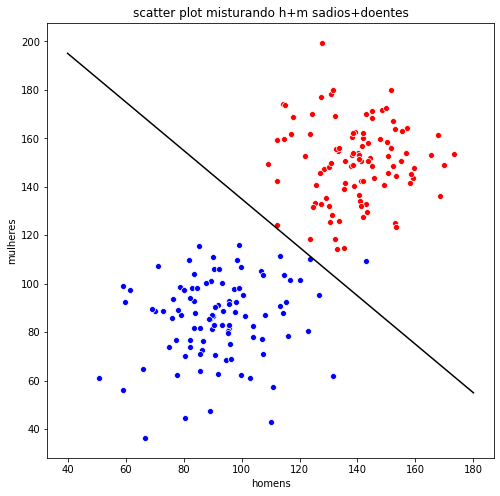

In [12]:
xseq = np.linspace(40, 180)
yseq = 235 -1*xseq

fig = plt.figure(figsize=(8, 8))

ax  = sns.scatterplot(sampDH, sampDM, color='red')
ret = sns.scatterplot(sampCH, sampCM, color='blue', ax=ax)

plt.plot(xseq, yseq, color='black')
plt.xlabel('homens')
plt.ylabel('mulheres')
plt.title('scatter plot misturando h+m sadios+doentes');

### Como funciona este classificador?

  - Todos os pontos acima da reta devem ser pacientes diabéticos
  - Todos os pontos abaixo da reta devem ser pacientes saudáveis

  - Porque utilizo o verbo **deve**?
  - Qual a função matemática para isto?

<br>
se y = -x * 235
<br><br>
então,  
y + x - 235 = 0 
<br><br> 
logo,
<br><br>

  - y + x - 235 > 0 => diabético  
  - y + x - 235 < 0 => saudável  
  - y + x - 235 = 0 => indeterminado
<br><br>
reflita sobre "= 0"
  - em vez de "igual a zero" poderíamos criar um faixa "próxima a zero"
<br><br>
é isto que SVM (support vector machine) faz ... mas não discutiremos esta técnica aqui